<a href="https://colab.research.google.com/github/nishanahafsath/Spotify_sentimental_analysis/blob/main/Sentimental_analysis_on_spotiy_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Objective and Brief
To develop deep learning algorithms with an aim to detect different types of sentiment contained in a collection of English sentences or a large paragraph and accurately predict the overall sentiment of the paragraph

# Project Guidelines

    Identify and finalize a collection of English sentences or a large paragraph which will also cover contradictory statements.

    Develop a deep learning model for detection & segmentation of sentiments whether positive, negative, or neutral from the paragraph.

    Enhance the previous algorithm to accurately predict the overall sentiment of the paragraph even if it contains contradictory statements.

    Test the model for accuracy

# **Dataset Description**

The dataset contains customer reviews and associated information for the popular music streaming service.The dataset includes attributes such as the time the review was submitted, the text within the review, the rating (1-5), the total thumbs up (how many people thought the review was helpful) and the review reply

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import string

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# Load your dataset
df=pd.read_csv("/content/drive/MyDrive/tcs project/reviews.csv")

In [4]:
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [5]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [6]:
df.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN
61593,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN


In [7]:
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [8]:
df.shape

(61594, 5)

## EDA

In [9]:
df.describe()

,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [11]:
df["Review"].nunique()

61356

In [12]:
df["Rating"].nunique()

5

In [13]:
df["Total_thumbsup"].nunique()

532

In [14]:
df.dtypes

Time_submitted    object
Review            object
Rating             int64
Total_thumbsup     int64
Reply             object
dtype: object

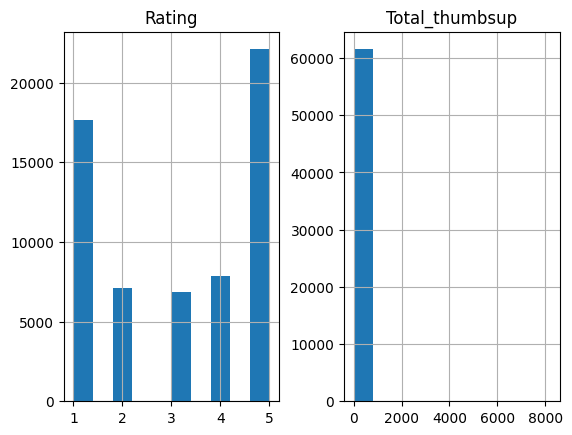

In [15]:
#plotting histogram
df.hist()
plt.show()

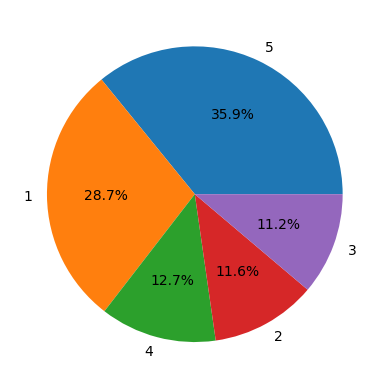

In [16]:
#pie chart  showing the distri=bution of rating

rating_counts = df['Rating'].value_counts()

plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.show()

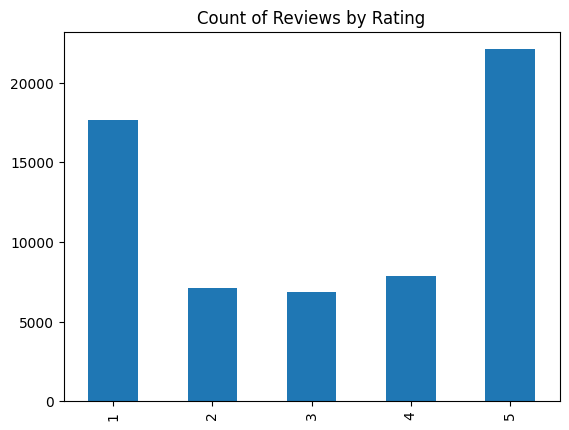

In [17]:
#Count of review by rating graph
ax = df['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Rating')
plt.show()

##Insights:
* Rating 5 has the highest frequency


* Rating 5 typically indicates a highly positive sentiment or satisfaction level


# Data Preprocessing

In [18]:
#Checking for missing values
df.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [19]:
df = df.drop(["Reply"], axis=1)

## Feature Reduction

In [20]:
#Droping  irrelevant columns
df = df.drop(["Time_submitted","Total_thumbsup"], axis=1)

In [21]:
x = df[["Review"]]

In [29]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the 'Review' column
df['Review'] = df['Review'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
 ##download the necessary stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'Review' column
df['Review'] = df['Review'].apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words]))


In [36]:
# Define a regular expression pattern for mentions
mention_pattern = r'\S+@\S+|\S+://\S+'

# Remove mentions from the 'Review' column
df['Review'] = df['Review'].apply(lambda text: re.sub(mention_pattern, '', text))

In [37]:
# Define a simple contractions mapping
contractions_mapping = {
    "can't": "cannot",
    "it's": "it is",
    "n't": "not",
    "'s": "is",
    "'re": "are",
    "'ve": "have"
}

# Replace contractions in the 'Review' column
for contraction, expansion in contractions_mapping.items():
    df['Review'] = df['Review'].str.replace(contraction, expansion)

In [38]:
# Convert text in the 'Review' column to lowercase
df['Review'] = df['Review'].str.lower()